<a href="https://colab.research.google.com/github/Vishu52/9d9b93d3-2a90-4e7f-96c1-7607df7a178f/blob/main/EDA_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-695656300.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
/tmp/ipython-input-695656300.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_rating_count = df.groupby("category").apply(


Shape: (1465, 16)
Missing Values:
 product_id                0
product_name              0
category                  0
discounted_price       1465
actual_price           1465
discount_percentage    1465
rating                    0
rating_count             20
about_product             0
user_id                   0
user_name                 0
review_id                 0
review_title              0
review_content            0
img_link                  0
product_link              0
dtype: int64

Average Rating by Category:
 category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4

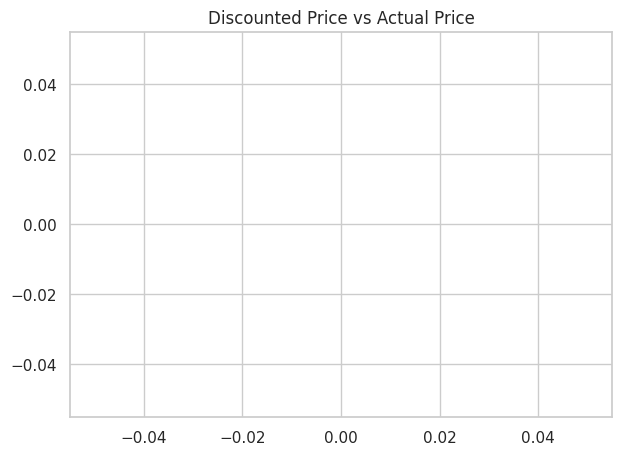


Average Discount % by Category:
 category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                   NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                  NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                          NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                       NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                          NaN
                                                                                                                          ..
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens       NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|P

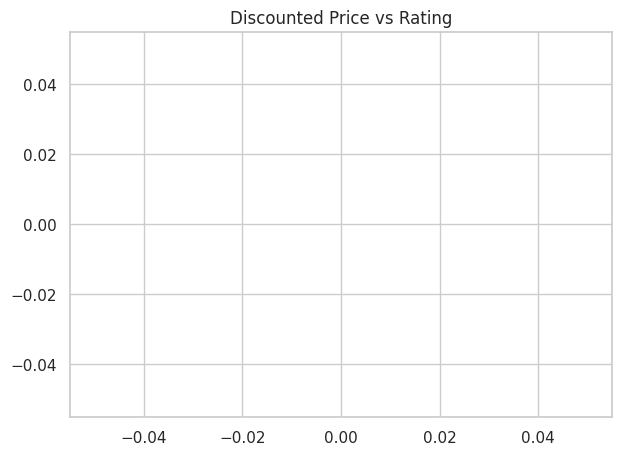


Top 5 Categories:
 category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64

Potential Improvements:

1. Categories with low ratings may need better product quality.
2. Products with high price but low rating_count need better marketing.
3. Repeated keywords in product names → Improve SEO.
4. Large discounts but low ratings → Quality issues.
5. Missing or short reviews → Improve review system.



In [3]:
# ============================================
# AMAZON SALES DATA ANALYSIS (ERROR-FREE + COLAB READY)
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. LOAD DATAFRAME
df = pd.read_csv("/content/amazon.csv")

# ============================
# FIX DATA TYPES (VERY IMPORTANT)
# ============================
numeric_cols = ["discounted_price", "actual_price", "discount_percentage", "rating", "rating_count"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Handle missing values
df.fillna(method="ffill", inplace=True)
df.drop_duplicates(inplace=True)

print("Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())

# ============================
# Q1. Average rating per category
# ============================
avg_rating = df.groupby("category")["rating"].mean().sort_values(ascending=False)
print("\nAverage Rating by Category:\n", avg_rating)

# ============================
# Q2. Top rating_count products by category
# ============================
top_rating_count = df.groupby("category").apply(
    lambda x: x.sort_values("rating_count", ascending=False).head(3)
)
print("\nTop Rating Count Products by Category:\n", top_rating_count)

# ============================
# Q3. Price Distribution Scatter Plot
# ============================
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="actual_price", y="discounted_price")
plt.title("Discounted Price vs Actual Price")
plt.show()

# ============================
# Q4. Average discount percentage by category
# ============================
avg_discount = df.groupby("category")["discount_percentage"].mean().sort_values(ascending=False)
print("\nAverage Discount % by Category:\n", avg_discount)

# ============================
# Q5. Most popular product names
# ============================
popular_products = df.sort_values("rating_count", ascending=False).head(10)[["product_name","rating_count"]]
print("\nMost Popular Product Names:\n", popular_products)

# ============================
# Q6. Popular product keywords
# ============================
df["keywords"] = df["product_name"].str.lower().str.split()
keywords = df["keywords"].explode().value_counts().head(20)
print("\nMost Popular Keywords:\n", keywords)

# ============================
# Q7. Most popular reviews
# ============================
popular_reviews = df.sort_values("rating_count", ascending=False)[["review_title","review_content"]].head(10)
print("\nMost Popular Reviews:\n", popular_reviews)

# ============================
# Q8. Correlation discounted_price vs rating
# ============================
corr_value = df["discounted_price"].corr(df["rating"])
print("\nCorrelation between Discounted Price & Rating:", corr_value)

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="discounted_price", y="rating")
plt.title("Discounted Price vs Rating")
plt.show()

# ============================
# Q9. Top 5 categories by ratings
# ============================
print("\nTop 5 Categories:\n", avg_rating.head(5))

# ============================
# Q10. Insights + Improvements
# ============================
print("\nPotential Improvements:")
print("""
1. Categories with low ratings may need better product quality.
2. Products with high price but low rating_count need better marketing.
3. Repeated keywords in product names → Improve SEO.
4. Large discounts but low ratings → Quality issues.
5. Missing or short reviews → Improve review system.
""")
